In [1]:
import numpy as np
import pandas as pd
import xlrd

import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, ifft, rfft

def fft_from_data_frame(data_frame):
    fs= 114e3
    signal_set = []
    for row in data_frame.values:
        fft_data = fft(row, n=row.size)/row.size
        freq = fftfreq(row.size, d=1/fs)
        cut_high_signal = np.abs(fft_data).copy()
        cut_high_signal[(freq > 50000)] = 0
        cut_high_signal[(freq < 30000)] = 0
        signal_without_0 = list(filter(lambda a: a != 0, cut_high_signal))
        signal_set.append(np.abs(signal_without_0))
    return signal_set

import glob

def get_fft_set(file_names):
    fft_set = []
    for front in file_names:
        data = pd.read_csv(front)
        fft_data = fft_from_data_frame(data)
        fft_set = fft_data + fft_set
    return fft_set

car_front_1 = glob.glob('./Documents/data_set/Result_without_filter/Car/67_Ford_Black_front/*_overall.csv')
car_front_2 = glob.glob('./Documents/data_set/Result_without_filter/Car/99_Fiesta_Purple_front/*_overall.csv')
car_side_1 = glob.glob('./Documents/data_set/Result_without_filter/Car/99_Fiesta_Purple_side/*_overall.csv')
car_side_2 = glob.glob('./Documents/data_set/Result_without_filter/Car/129_Skoda_Grey_side/*_overall.csv')
car_back_1 = glob.glob('./Documents/data_set/Result_without_filter/Car/26_Ford_Black_back/*_overall.csv')
car_back_2 = glob.glob('./Documents/data_set/Result_without_filter/Car/66_Ford_Purple_back/*_overall.csv')

motorbike_1 = glob.glob('./Documents/data_set/Result_without_filter/Motorbike/92_CBF_Honda_side1/*_overall.csv')
motorbike_2 = glob.glob('./Documents/data_set/Result_without_filter/Motorbike/92_CBF_Honda_side2/*_overall.csv')

cycle_1 = glob.glob('./Documents/data_set/Result_without_filter/Cycle/Cycle_1/*_overall.csv')

human_A = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_A/*_overall.csv')
human_B = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_B/*_overall.csv')
human_C = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_C/*_overall.csv')
human_D = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_D/*_overall.csv')
human_E = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_E/*_overall.csv')
human_F = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_F/*_overall.csv')
human_G= glob.glob('./Documents/data_set/Result_without_filter/Human/Human_G/*_overall.csv')
human_H = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_H/*_overall.csv')
human_I = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_I/*_overall.csv')

pillar_1 = glob.glob('./Documents/data_set/Result_without_filter/Pillar/Pillar_1/*_overall.csv')
pillar_2 = glob.glob('./Documents/data_set/Result_without_filter/Pillar/Pillar_2/*_overall.csv')
pillar_3 = glob.glob('./Documents/data_set/Result_without_filter/Pillar/Pillar_3/*_overall.csv')

stopper_1 = glob.glob('./Documents/data_set/Result_without_filter/Stopper/Stopper_1/*_overall.csv')
stopper_2 = glob.glob('./Documents/data_set/Result_without_filter/Stopper/Stopper_2/*_overall.csv')

wall_1 = glob.glob('./Documents/data_set/Result_without_filter/Wall/Wall_1/*_overall.csv')
wall_2 = glob.glob('./Documents/data_set/Result_without_filter/Wall/Wall_2/*_overall.csv')
wall_3 = glob.glob('./Documents/data_set/Result_without_filter/Wall/Wall_3/*_overall.csv')

car_front_1_fft = get_fft_set(car_front_1)
car_front_2_fft = get_fft_set(car_front_2)
car_side_1_fft = get_fft_set(car_side_1)
car_side_2_fft = get_fft_set(car_side_2)
car_back_1_fft = get_fft_set(car_back_1)
car_back_2_fft = get_fft_set(car_back_2)

motorbike_1_fft = get_fft_set(motorbike_1)
motorbike_2_fft = get_fft_set(motorbike_2)

cycle_1_fft = get_fft_set(cycle_1)

human_A_fft = get_fft_set(human_A)
human_B_fft = get_fft_set(human_B)
human_C_fft = get_fft_set(human_C)
human_D_fft = get_fft_set(human_D)
human_E_fft = get_fft_set(human_E)
human_F_fft = get_fft_set(human_F)
human_G_fft = get_fft_set(human_G)
human_H_fft = get_fft_set(human_H)
human_I_fft = get_fft_set(human_I)

pillar_1_fft = get_fft_set(pillar_1)
pillar_2_fft = get_fft_set(pillar_2)
pillar_3_fft = get_fft_set(pillar_3)

stopper_1_fft = get_fft_set(stopper_1)
stopper_2_fft = get_fft_set(stopper_2)

wall_1_fft = get_fft_set(wall_1)
wall_2_fft = get_fft_set(wall_2)
wall_3_fft = get_fft_set(wall_3)

car = car_front_1_fft + car_front_2_fft + car_side_1_fft + car_side_2_fft + car_back_1_fft + car_back_2_fft
motorbike = motorbike_1_fft + motorbike_2_fft
cycle = cycle_1_fft
human = human_A_fft + human_B_fft + human_C_fft + human_D_fft + human_E_fft + human_F_fft + human_G_fft + human_H_fft + human_I_fft
pillar = pillar_1_fft + pillar_2_fft + pillar_3_fft
concrete = stopper_1_fft + stopper_2_fft
wall = wall_1_fft + wall_2_fft + wall_3_fft
 
X = car + motorbike + cycle + human + pillar + concrete + wall
y = len(car)*['Car'] + len(motorbike)*['Motorbike'] + len(cycle)*['Cycle'] + len(human)*['Human'] + len(pillar)*['Pillar'] + len(concrete)*['Concrete'] + len(wall)*['Wall']

print("Car: ",len(car))
print("Motorbike: ",len(motorbike))
print("Cycle: ",len(cycle))
print("Human: ",len(human))
print("Pillar: ",len(pillar))
print("Concrete: ",len(concrete))
print("Wall: ",len(wall))
result = len(car) + len(motorbike) + len(cycle) + len(human) + len(pillar) + len(concrete) + len(wall)
print("Total data:", np.array(X).shape)

Car:  11234
Motorbike:  2122
Cycle:  294
Human:  5124
Pillar:  9362
Concrete:  2372
Wall:  5034
Total data: (35542, 90)


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [3]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt  

def plot_confusionMatrix(y_test, result, labels = ['CAR', 'MOTORBIKE', 'CYCLE', 'HUMAN', 'PILLAR', 'CONCRETE', 'WALL']):
    cm = confusion_matrix(y_test, result)
    print(cm)
    recall_set = []
    cm_overall = []
    F1_SCORE_Overall = 0
    for index, value in enumerate(labels):
#         print(index, labels[index])
        precision = round(precision_score(y_test, result, average='micro',labels=labels[index]),2)
        recall = round(recall_score(y_test, result, average='micro',labels=labels[index]),2)
        F1_SCORE = round(f1_score(y_test, result, average='micro',labels=labels[index]),2)
#         print(value,"_F1-score:", F1_SCORE)
        
        recall_set.append(recall)
        cm_overall.append(np.append(cm[index], precision))
        
    score = accuracy_score(result, y_test)
    cm_overall.append(np.append(recall_set, score))
#     print(recall_set, cm_overall) 
    sum = np.sum(cm, axis=1)
    cm = cm_overall   
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=True, ax = ax,linewidths=.5,fmt='g',cmap="Greens"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title(title); 
    counter = 0
    for i in range(0,7):
        for j in range(0,8):
            percentage = cm[i][j]/sum[i]
            t = ax.texts[counter]
            if j == 7 :
                t.set_text(str(cm[i][j]))
            else:
                t.set_text(str(cm[i][j]) + '\n' + str(round(percentage*100,2)) + " %")
            counter = counter + 1
    ax.xaxis.set_ticklabels(labels); 
    ax.yaxis.set_ticklabels(labels);

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 14, whiten='True')
pca_x = pca.fit(X).transform(X)
pca_x.shape

(35542, 14)

In [6]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(pca_x, y, test_size=0.40, random_state=42)
normalized_X_train_after_feature_reduction = preprocessing.normalize(X_train)
normalized_X_test_after_feature_reduction = preprocessing.normalize(X_test)

0.9455581346275586
[[4463    2    0   59    0    1    1]
 [  11  882    0   16    0   22    0]
 [   2   10   64   40    0    6    0]
 [ 162   31    0 1727    4   83   10]
 [  86    1    0   32  677   33   23]
 [   8   17    0    2    0 3668    8]
 [  14   11    0    6    1   72 1962]]


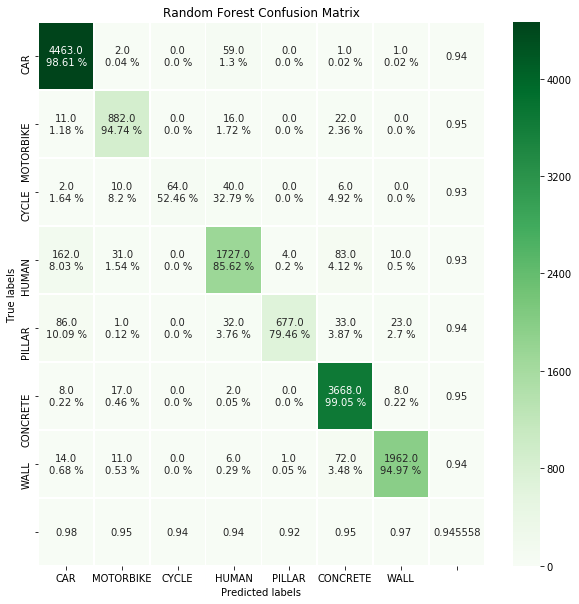

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(normalized_X_train_after_feature_reduction, y_train)
result = clf.predict(normalized_X_test_after_feature_reduction)

title = ('Random Forest Confusion Matrix')
print(accuracy_score(y_test, result))
plot_confusionMatrix(y_test, result)

Accuracy: 0.962720686502075
[[4476    0    0   50    0    0    0]
 [  12  894    0    7    0   17    1]
 [   0   13   99    6    0    4    0]
 [ 134   43   14 1717   26   71   12]
 [  19    4    3   21  786   13    6]
 [   2   10    0    2    0 3685    4]
 [   2    2    0    5    2   25 2030]]


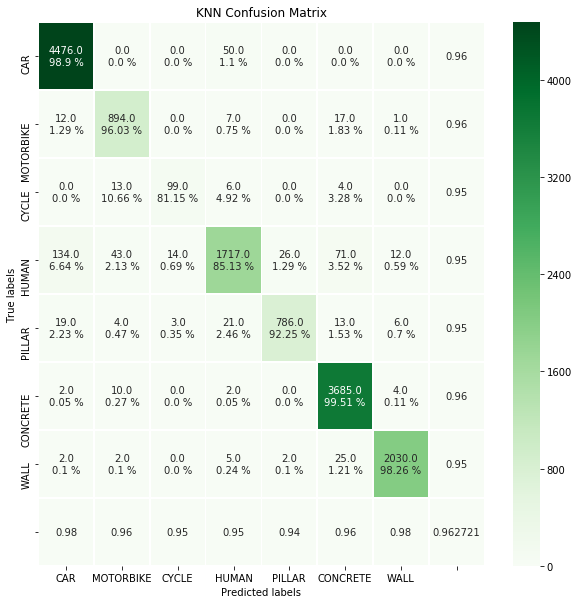

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(normalized_X_train_after_feature_reduction,y_train)
result = knn.predict(normalized_X_test_after_feature_reduction)

# print('\nThe number of neighbors used to predict the target : ',clf.n_neighbors)

title = ('KNN Confusion Matrix')
# print(confusion_matrix(y_test, result)) 
print("Accuracy:", accuracy_score(y_test, result))
plot_confusionMatrix(y_test, result)

In [21]:
print(pca.explained_variance_ratio_)

[0.83039625 0.04436454 0.03673369 0.0168313  0.01198188 0.00899431
 0.00849174 0.00531884 0.00484135 0.0039122  0.00325425 0.00270718
 0.00238595 0.0020318 ]


In [65]:
print(pca.components_)

[[ 7.49101333e-04  9.62387362e-04  9.56290692e-04 ...  7.85610318e-04
  -4.11731780e-04  7.53848013e-04]
 [-8.45966265e-04 -4.68345154e-04 -4.54339797e-04 ... -8.87383866e-04
   2.59126813e-04 -7.81563121e-05]
 [ 1.16812545e-03  1.12428514e-03  1.19555406e-03 ...  7.07912018e-04
  -4.91358722e-04  8.67675035e-04]
 ...
 [-1.72171733e-05 -3.49104633e-04 -6.31957416e-04 ...  2.20412216e-03
   1.59797082e-03 -5.09918232e-04]
 [ 7.22569951e-03  4.67833101e-03  4.68322913e-03 ...  1.32380969e-03
   4.53013616e-03  4.52707934e-03]
 [ 3.20187905e-03  4.36498430e-04  2.16216006e-03 ...  7.17551864e-03
  -3.76288927e-03  4.88999577e-03]]
